# Car Price Prediction Using MachineLearning
## 1.Problem Definition
> The Task is to predict the Selling price of a car given various parameters using  machine learning model.
## 2.Data
> The data has been collected from Kaggle : "https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars"
>
>The Dataset contains 9 features
## 3.Evaluation
> The evaluation of a model will be based on the metrics : Mean Squared Error(MSE),Mean Absolute Error(MAE),R2 Score
## 4.Features
* The Dataset contains the following features :
  1. car name
  2. Year
  3. selling price
  4. present price
  5. driven km
  6. fuel type
  7. trnsmission
  8. owner
  
 

### Impoting modules required and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_data.duplicated().sum()

2

In [8]:
car_data.drop_duplicates(inplace=True)
car_data.duplicated().sum()

0

### Exploratory Data Analysis(EDA)

In [9]:
corr=car_data.corr(numeric_only=True)
corr

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Year'),
  Text(1.5, 0, 'Selling_Price'),
  Text(2.5, 0, 'Present_Price'),
  Text(3.5, 0, 'Driven_kms'),
  Text(4.5, 0, 'Owner')])

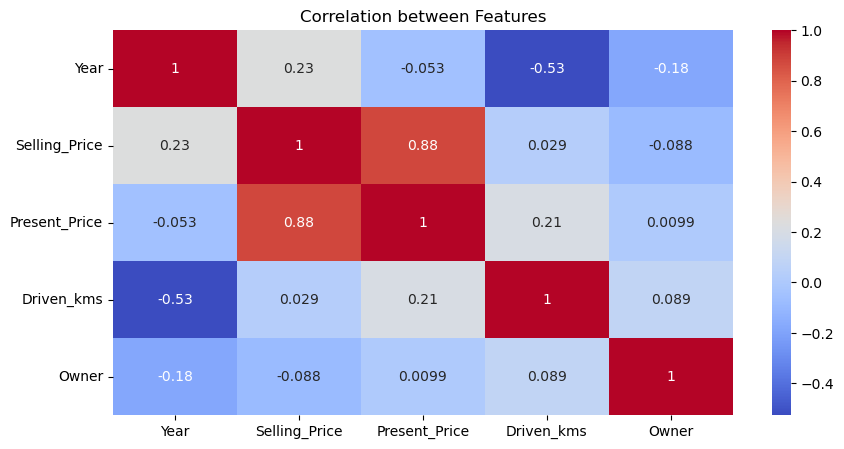

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation between Features")
plt.xticks(rotation=0)

In [11]:
#sns.pairplot(data=car_data,hue="Selling_Price",palette="coolwarm")

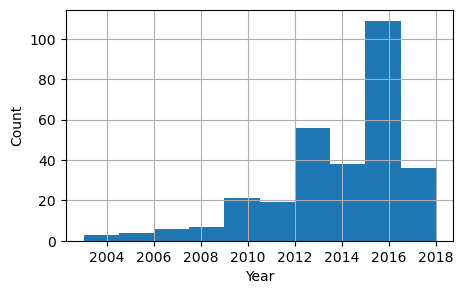

In [12]:
plt.figure(figsize=(5,3))
car_data["Year"].hist();
plt.xlabel("Year")
plt.ylabel('Count');

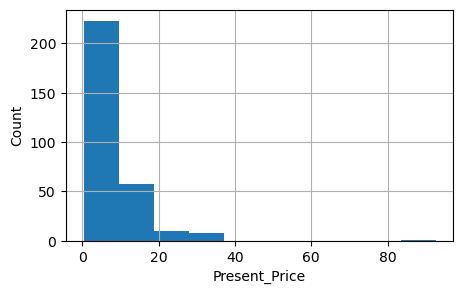

In [13]:
plt.figure(figsize=(5,3))
car_data["Present_Price"].hist()
plt.xlabel("Present_Price")
plt.ylabel('Count');

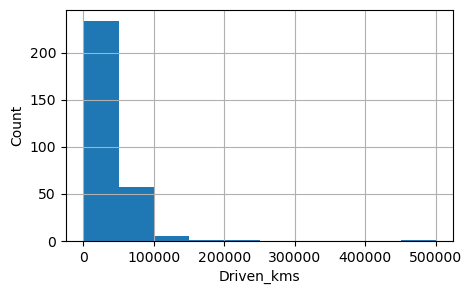

In [14]:
plt.figure(figsize=(5,3))
car_data["Driven_kms"].hist()
plt.xlabel("Driven_kms")
plt.ylabel('Count');

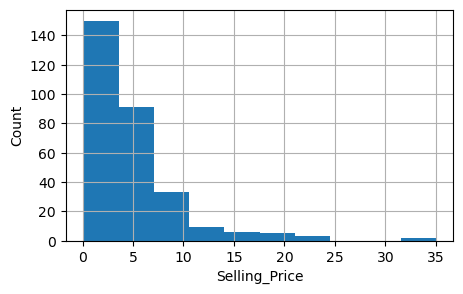

In [15]:
plt.figure(figsize=(5,3))
car_data["Selling_Price"].hist()
plt.xlabel("Selling_Price")
plt.ylabel('Count');

### PreProcessing data

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
car_data["Fuel_Type"] = encoder.fit_transform(car_data["Fuel_Type"])
car_data["Selling_type"] = encoder.fit_transform(car_data["Selling_type"])
car_data["Transmission"] = encoder.fit_transform(car_data["Transmission"])
car_data["Car_Name"] = encoder.fit_transform(car_data["Car_Name"])

In [20]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [30]:
car_data["Fuel_Type"].value_counts()

Fuel_Type
2    239
1     58
0      2
Name: count, dtype: int64

In [34]:
car_data["Car_Name"].value_counts()

Car_Name
69    26
71    16
94    14
66    10
81    10
      ..
34     1
59     1
13     1
2      1
8      1
Name: count, Length: 98, dtype: int64

In [32]:
car_data.dtypes

Car_Name           int32
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int32
Owner              int64
dtype: object

In [23]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


### Splitting Train and Test datasets

In [38]:
from sklearn.model_selection import train_test_split
X = car_data.drop("Selling_Price",axis=1)
y = car_data["Selling_Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [39]:
print("Training Data Dimension :")
X_train.shape

Training Data Dimension :


(239, 8)

In [40]:
print("Testing Data Dimension :")
X_test.shape

Testing Data Dimension :


(60, 8)

In [41]:
X_train.head()

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
28,63,2010,3.95,44542,2,0,1,0
22,93,2011,8.01,50000,2,0,0,0
129,60,2017,0.84,5000,2,1,1,0
82,86,2017,25.39,15000,1,0,0,0
173,2,2017,0.51,1300,2,1,0,0


### Model Initialization

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_preds = model.predict(X_test)
y_preds

array([ 0.4539,  6.1275,  4.387 ,  0.389 ,  0.3083, 12.0614,  2.8495,
        6.2397,  2.3375,  4.4045,  6.849 ,  1.1528, 15.7425, 16.7509,
        0.561 ,  1.2075,  0.7033,  2.3995,  3.5671,  9.1822,  0.1796,
        2.5015,  0.2404,  8.1766,  4.5825,  3.834 ,  5.427 ,  5.077 ,
        5.7369,  2.9015,  6.227 ,  3.4628,  7.1765,  6.718 , 11.8306,
        3.8635,  8.1695,  1.2211,  1.1881,  0.4247,  5.2385,  0.4584,
        1.1976,  0.4496,  3.934 ,  4.978 , 11.257 ,  2.7595,  4.4875,
        5.753 ,  0.5602,  2.6715,  5.0205,  0.504 ,  4.5985, 12.0538,
        4.23  ,  9.097 ,  8.7838,  7.9914])

In [60]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train,y_train)

LinearRegression()

In [61]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

array([ 3.33115992e+00,  5.61636032e+00,  3.87733704e+00,  5.48980058e-01,
       -4.83267671e-03,  1.06755337e+01,  2.73781804e+00,  8.53505141e+00,
        2.26476368e+00,  4.63831776e+00,  6.92724687e+00,  1.92751001e+00,
        1.45592651e+01,  1.68452734e+01,  3.78087139e-01,  1.02805432e+00,
        1.76779608e+00,  4.80574867e+00,  3.87186368e+00,  1.13562901e+01,
       -6.35461906e+00,  2.78160611e+00, -1.00425251e+00,  8.06929151e+00,
        4.56223079e+00,  4.49957032e+00,  5.62791325e+00,  6.89157844e+00,
        7.68265830e+00,  3.08718101e+00,  5.75002097e+00,  3.86423134e+00,
        6.87026693e+00,  6.18745152e+00,  8.23141363e+00,  3.36021632e+00,
        6.82366121e+00,  2.06189678e+00,  1.66103445e+00,  9.71289680e-01,
        4.26603611e+00, -3.79339087e-01,  1.53565032e+00, -1.82428385e+00,
        4.83859274e+00,  5.80897619e+00,  9.54787807e+00,  1.83103814e+00,
        5.21643120e+00,  4.98215201e+00,  2.45046309e-01,  1.99152442e+00,
        5.52393284e+00,  

### Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Abolute Error(MAE) :",mean_absolute_error(y_test,y_preds))
print("Mean Squared Error(MSE) :",mean_squared_error(y_test,y_preds))
print("R2 Score :",r2_score(y_test,y_preds))

Mean Abolute Error(MAE) : 0.7506649999999998
Mean Squared Error(MSE) : 2.4336546941666652
R2 Score : 0.8435945796568387


In [63]:
print("Linear Regression Model predicted errors :")
print("Mean Abolute Error(MAE) :",mean_absolute_error(y_test,y_preds_2))
print("Mean Squared Error(MSE) :",mean_squared_error(y_test,y_preds_2))
print("R2 Score :",r2_score(y_test,y_preds_2))

Linear Regression Model predicted errors :
Mean Abolute Error(MAE) : 1.3772211146523672
Mean Squared Error(MSE) : 4.557213182384303
R2 Score : 0.7071183331420478


#### Therefore Random Forest Regressor is better than the Liner Regression model

### Feature Importance

In [51]:
model.feature_importances_

array([1.42972793e-02, 5.56109777e-02, 9.02345016e-01, 1.73711469e-02,
       2.08288207e-03, 3.21832325e-03, 5.06125591e-03, 1.31186562e-05])

In [50]:
len(model.feature_importances_)

8

In [59]:
X_train.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [57]:
def plot_features(columns,importances):
    df=pd.DataFrame({"features":columns,
                     "feature_importances":importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True)
    fig,ax = plt.subplots()
    ax.barh(df["features"],df["feature_importances"])
    ax.set_xlabel("Feature Importance")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

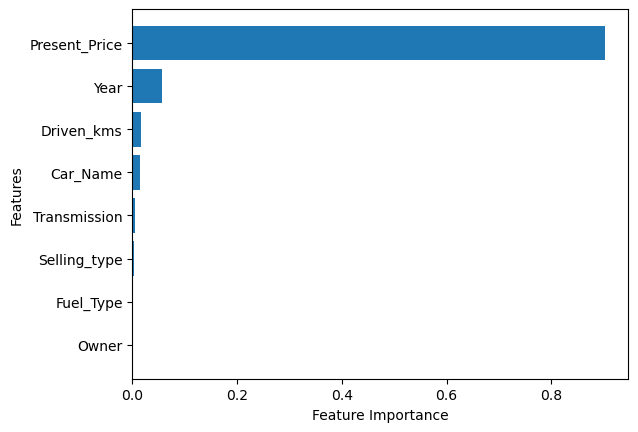

In [58]:
plot_features(X_train.columns,model.feature_importances_)

### HyperParameter Tuning

In [64]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
from sklearn.model_selection import RandomizedSearchCV
rs_grid = {"n_estimators":[100,200,300],
           "min_samples_split":[2,4,6],
           "min_samples_leaf":[1,2],
           "max_samples":[None,5],
           "max_depth":[None]}
reg = RandomForestRegressor(n_estimators=100,min_samples_leaf= 1,
                            min_samples_split= 2)
rs_reg = RandomizedSearchCV(param_distributions=rs_grid,
                            estimator=reg,
                            cv=5,
                            n_iter=3,
                            verbose=False)
rs_reg.fit(X_train,y_train) 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3,
                   param_distributions={'max_depth': [None],
                                        'max_samples': [None, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 300]},
                   verbose=False)

In [77]:
rs_reg.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_depth': None}

In [78]:
rs_preds = rs_reg.predict(X_test)

In [79]:
print("Mean Abolute Error(MAE) :",mean_absolute_error(y_test,rs_preds))
print("Mean Squared Error(MSE) :",mean_squared_error(y_test,rs_preds))
print("R2 Score :",r2_score(y_test,rs_preds))

Mean Abolute Error(MAE) : 0.7423666666666666
Mean Squared Error(MSE) : 2.6755444053333326
R2 Score : 0.8280488812295344
